In [22]:
# prompt: DO the same as above but add code for 3 more equations, the double dot values of each angle

import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


g = 9.81

# Define the equations of motion (replace with your actual equations)
def x_ddot(m, T, phi, theta, psi):
    # Replace this with your actual equation for x_ddot
    return (T * (np.sin(phi) * np.sin(psi) + np.cos(phi) * np.sin(theta) * np.cos(psi)) )/ m

def y_ddot(m, T, phi, theta, psi):
  # Replace this with your actual equation for y_ddot
  return (T * np.cos(phi) * np.sin(theta))/m

def z_ddot(m, T, phi, theta, psi):
  # Replace this with your actual equation for z_ddot
  return (T * (np.cos(phi) * np.cos(theta))) /m - g

def phi_ddot(m, T, phi, theta, psi, Jx, Dx):
    return (T * np.sin(theta) * np.sin(psi)) / Jx - (Dx * phi)/Jx

def theta_ddot(m,T,phi,theta,psi,Jy,Dy):
    return (T * np.cos(phi)) / Jy - (Dy * theta) / Jy

def psi_ddot(m,T,phi,theta,psi,Jz,Dz):
    return (T * np.cos(theta)*np.sin(phi)) / Jz - (Dz * psi) / Jz


# Create interactive plots
@interact(m=widgets.FloatSlider(min=0.1, max=10, step=0.1, value=1, description='Mass (m)'),
          T=widgets.FloatSlider(min=0, max=10, step=0.1, value=1, description='Torque (T)'),
          phi=widgets.FloatSlider(min=0, max=2 * np.pi, step=0.1, value=0, description='Phi'),
          theta=widgets.FloatSlider(min=0, max=2 * np.pi, step=0.1, value=0, description='Theta'),
          psi=widgets.FloatSlider(min=0, max=2 * np.pi, step=0.1, value=0, description='Psi'),
          Jx=widgets.FloatSlider(min=0.1, max=10, step=0.1, value=1, description='Jx'),
          Jy=widgets.FloatSlider(min=0.1, max=10, step=0.1, value=1, description='Jy'),
          Jz=widgets.FloatSlider(min=0.1, max=10, step=0.1, value=1, description='Jz'),
          Dx=widgets.FloatSlider(min=0, max=1, step=0.1, value=0, description='Dx'),
          Dy=widgets.FloatSlider(min=0, max=1, step=0.1, value=0, description='Dy'),
          Dz=widgets.FloatSlider(min=0, max=1, step=0.1, value=0, description='Dz'))

def plot_equations(m, T, phi, theta, psi, Jx, Jy, Jz, Dx, Dy, Dz):
    # Create time array
    t = np.linspace(0, 10, 100) # Adjust time range as needed

    # Calculate x_ddot, y_ddot, and z_ddot for the given parameters
    x_ddot_vals = x_ddot(m, T, phi, theta, psi)
    y_ddot_vals = y_ddot(m, T, phi, theta, psi)
    z_ddot_vals = z_ddot(m, T, phi, theta, psi)
    phi_ddot_vals = phi_ddot(m, T, phi, theta, psi, Jx, Dx)
    theta_ddot_vals = theta_ddot(m,T,phi,theta,psi,Jy,Dy)
    psi_ddot_vals = psi_ddot(m,T,phi,theta,psi,Jz,Dz)

    # Create subplots
    fig, axs = plt.subplots(6, 1, figsize=(8, 16))

    # Plot the results
    axs[0].plot(t, x_ddot_vals * np.ones_like(t), label='x_ddot') #x_ddot is independent of time, so just plotting constant
    axs[0].set_xlabel('Time')
    axs[0].set_ylabel('x_ddot')
    axs[0].set_title('Equation of Motion for x_ddot')
    axs[0].legend()

    axs[1].plot(t, y_ddot_vals * np.ones_like(t), label='y_ddot')
    axs[1].set_xlabel('Time')
    axs[1].set_ylabel('y_ddot')
    axs[1].set_title('Equation of Motion for y_ddot')
    axs[1].legend()

    axs[2].plot(t, z_ddot_vals * np.ones_like(t), label='z_ddot')
    axs[2].set_xlabel('Time')
    axs[2].set_ylabel('z_ddot')
    axs[2].set_title('Equation of Motion for z_ddot')
    axs[2].legend()

    axs[3].plot(t, phi_ddot_vals * np.ones_like(t), label='$\ddot{\phi}$')
    axs[3].set_xlabel('Time')
    axs[3].set_ylabel('$\ddot{\phi}$')
    axs[3].set_title('Equation of Motion for $\ddot{\phi}$')
    axs[3].legend()

    axs[4].plot(t, theta_ddot_vals * np.ones_like(t), label='$\ddot{\Theta}$')
    axs[4].set_xlabel('Time')
    axs[4].set_ylabel('$\ddot{\Theta}$')
    axs[4].set_title('Equation of Motion for $\ddot{\Theta}$')
    axs[4].legend()

    axs[5].plot(t, psi_ddot_vals * np.ones_like(t), label='$\ddot{\Psi}$')
    axs[5].set_xlabel('Time')
    axs[5].set_ylabel('$\ddot{\Psi}$')
    axs[5].set_title('Equation of Motion for $\ddot{\Psi}$')
    axs[5].legend()

    plt.tight_layout()
    plt.show()

interactive(children=(FloatSlider(value=1.0, description='Mass (m)', max=10.0, min=0.1), FloatSlider(value=1.0…

In [23]:

# Parameters
Mtotal = 355.3 /1000    # g to kg
Marm = 6 / 1000         # g to kg
Larm = 84 / 1000        # mm to m
Warm = 4 / 1000         # mm to m
Harm = 1 / 1000         # mm to m

Mbody = 268.1 / 1000    # g to kg
Lbody = 89 / 1000       # mm to m
Wbody = 60 / 1000       # mm to m
Hbody = 42 / 1000       # mm to m

r = 62.23 / 1000        # mm to m
Mrotor = 15.8 / 1000    # g to kg

# Moments of Inertia
ix = (1/12) * Mbody * (Wbody**2 + Hbody**2) \
   + 4 * ((1/12) * Marm * (Harm**2 + Warm**2) + Marm * Larm**2) \
   + 2 * (Mrotor * Larm**2)

iy = (1/12) * Mbody * (Lbody**2 + Hbody**2) \
   + 4 * ((1/12) * Marm * (Larm**2 + Warm**2) + Marm * Larm**2) \
   + 2 * (Mrotor * Larm**2)

iz = (1/12) * Mbody * (Lbody**2 + Wbody**2) \
   + 4 * ((1/12) * Marm * (Larm**2 + Harm**2)) \
   + 4 * (Mrotor * r**2)

# Output the results
print(f"Ix = {ix:.6f} kg·m²")
print(f"Iy = {iy:.6f} kg·m²")
print(f"Iz = {iz:.6f} kg·m²")


Ix = 0.000512 kg·m²
Iy = 0.000623 kg·m²
Iz = 0.000516 kg·m²


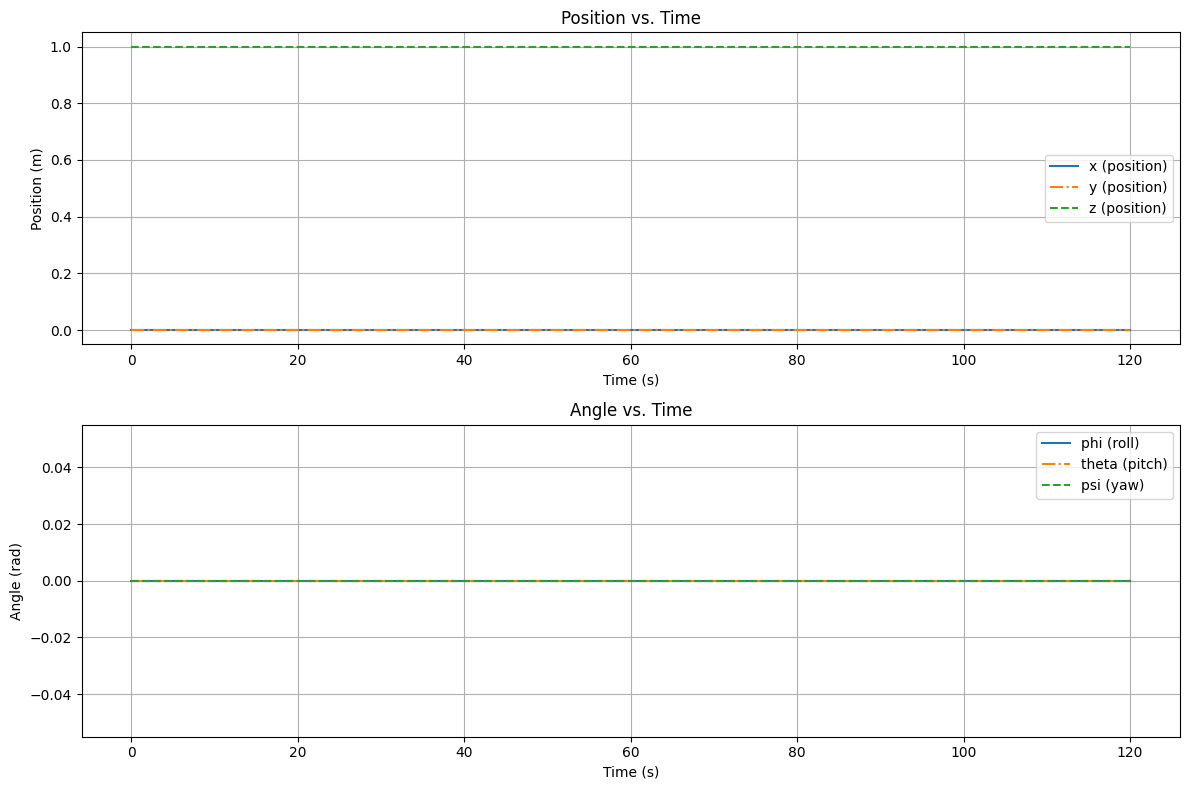

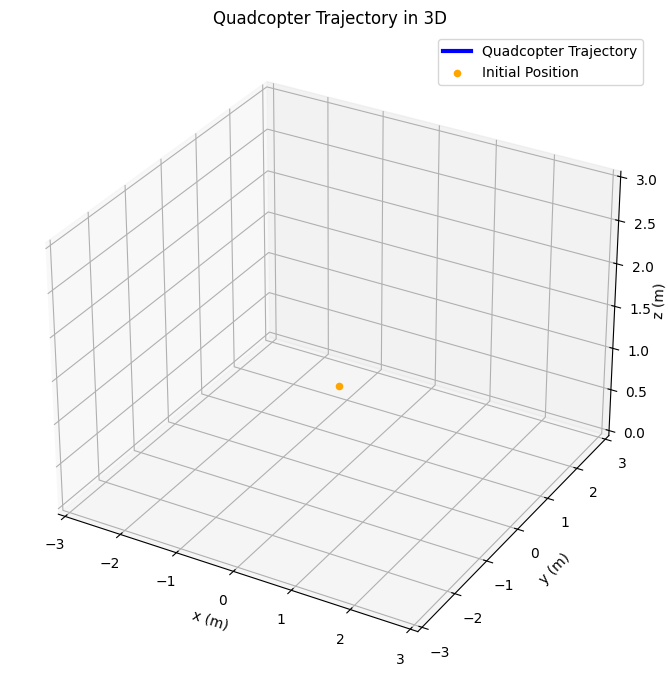

In [24]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Constants (provide values for these variables)
m = .355   # Mass (kg)
g = 9.81   # Gravitational acceleration (m/s^2)
k = .000001   # Lift constant
b = 0    # Drag constant
l = 0.084    # Arm length (m)
Ix = 0.000512  # Moment of inertia about x-axis
Iy = 0.000623   # Moment of inertia about y-axis
Iz = 0.000516   # Moment of inertia about z-axis

# Provide rotor angular velocities
w1 = 933.079579
w2 = 933.079579
w3 = 933.079579
w4 = 933.079579

# Equations of motion (define these functions based on your equations)

def equations(t, state):
    x, y, z, phi, theta, psi, xdot, ydot, zdot, phidot, thetadot, psidot = state

    # Forces and torques
    T = k * (w1**2 + w2**2 + w3**2 + w4**2)           # Total thrust
    tau_phi = l * k * (w2**2 - w4**2)                # Torque about x-axis
    tau_theta = l * k * (w3**2 - w1**2)              # Torque about y-axis
    tau_psi = b * (w1**2 - w2**2 + w3**2 - w4**2)    # Torque about z-axis

    # Accelerations
    xddot = (T/m)*(np.sin(phi)*np.sin(psi) + np.cos(phi)*np.sin(theta)*np.cos(psi))
    yddot = (T/m)*(-np.sin(phi)*np.cos(psi) + np.cos(phi)*np.sin(theta)*np.sin(psi))
    zddot = (T / m)*np.cos(phi)*np.cos(theta) - g

    phiddot = (1 / Ix) * (tau_phi - (Iy - Iz) * thetadot * psidot)
    thetaddot = (1 / Iy) * (tau_theta - (Iz - Ix) * phidot * psidot)
    psiddot = (1 / Iz) * (tau_psi - (Ix - Iy) * phidot * thetadot)

    return [
        xdot, ydot, zdot, phidot, thetadot, psidot,  # First derivatives
        xddot, yddot, zddot, phiddot, thetaddot, psiddot  # Second derivatives
    ]

# Initial conditions
initial_state = [
    0, 0, 1,      # Initial positions (x, y, z)
    0, 0, 0,      # Initial angles (phi, theta, psi)
    0, 0, 0,      # Initial velocities (xdot, ydot, zdot)
    0, 0, 0       # Initial angular velocities (phidot, thetadot, psidot)
]

# Time span
t_span = (0, 120)  # Simulate from 0 to 10 seconds
t_eval = np.linspace(t_span[0], t_span[1], 1000)  # Time points for evaluation

# Solve the system
solution = solve_ivp(equations, t_span, initial_state, t_eval=t_eval, method='RK45')

# Extract solutions
x, y, z, phi, theta, psi = solution.y[:6]

# Plot results
plt.figure(figsize=(12, 8))

# Position plots
plt.subplot(2, 1, 1)
plt.plot(solution.t, x, label='x (position)', linestyle='-')
plt.plot(solution.t, y, label='y (position)', linestyle='-.')
plt.plot(solution.t, z, label='z (position)', linestyle='--')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.title('Position vs. Time')
plt.legend()
plt.grid()

# Angle plots
plt.subplot(2, 1, 2)
plt.plot(solution.t, phi, label='phi (roll)', linestyle='-')
plt.plot(solution.t, theta, label='theta (pitch)', linestyle='-.')
plt.plot(solution.t, psi, label='psi (yaw)', linestyle='--')
plt.xlabel('Time (s)')
plt.ylabel('Angle (rad)')
plt.title('Angle vs. Time')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# 3D Trajectory Plot
fig_3D = plt.figure(figsize=(8,8))
ax = fig_3D.add_subplot(111, projection='3d')
ax.plot3D(solution.y[0], solution.y[1], solution.y[2], label='Quadcopter Trajectory', color='b', linewidth=3)
ax.scatter(solution.y[0][0], solution.y[1][0], solution.y[2][0], color='orange', s=20, label='Initial Position')
ax.set_title('Quadcopter Trajectory in 3D')
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
ax.set_zlabel('z (m)', labelpad=-1)
ax.legend()
ax.grid()
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_zlim(0, 3)
fig_3D.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)

#print(f"x: {x[0]} to {x[-1]}")
#print(f"y: {y[0]} to {y[-1]}")
#print(f"z: {z[0]} to {z[-1]}")